In [2]:
from transformers import YolosImageProcessor, YolosForObjectDetection
from PIL import Image
import torch
import requests
from matplotlib import pyplot as plt
import matplotlib.patches as patches
import cv2

c:\Users\AgitaSolzemnieceADC\anaconda3\envs\yolo-app\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
model = YolosForObjectDetection.from_pretrained('hustvl/yolos-tiny')
image_processor = YolosImageProcessor.from_pretrained("hustvl/yolos-tiny")

The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


### Static test

In [9]:
# url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/e/e4/Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg/800px-Cars_in_traffic_in_Auckland%2C_New_Zealand_-_copyright-free_photo_released_to_public_domain.jpg'
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

path = "DALLE_img.png"
image = Image.open(path)

inputs = image_processor(images=image, return_tensors="pt")
outputs = model(**inputs)

# model predicts bounding boxes and corresponding COCO classes
logits = outputs.logits
bboxes = outputs.pred_boxes

# print results
target_sizes = torch.tensor([image.size[::-1]]) # Swapping around the img size dimension --> EDU: most deep-learning frameworks represent images in (height,width) format
results = image_processor.post_process_object_detection(outputs, threshold=0.7, target_sizes=target_sizes)[0]
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    print(
        f"Detected {model.config.id2label[label.item()]} with confidence "
        f"{round(score.item(), 3)} at location {box}"
    )

Detected car with confidence 0.715 at location [0.27, 115.78, 76.4, 196.84]
Detected car with confidence 0.745 at location [307.76, 175.3, 404.57, 234.72]
Detected motorcycle with confidence 0.822 at location [554.22, 347.33, 601.01, 387.35]
Detected person with confidence 0.772 at location [147.99, 504.46, 176.34, 533.29]
Detected car with confidence 0.796 at location [151.31, 186.42, 297.26, 303.0]
Detected person with confidence 0.791 at location [643.39, 306.75, 680.28, 366.66]
Detected car with confidence 0.974 at location [341.27, 371.69, 495.44, 483.1]
Detected car with confidence 0.927 at location [199.73, 415.41, 326.44, 512.41]
Detected car with confidence 0.933 at location [8.52, 336.57, 139.0, 433.93]
Detected motorcycle with confidence 0.792 at location [761.16, 388.15, 809.21, 445.77]
Detected car with confidence 0.823 at location [183.91, 162.44, 292.06, 237.72]
Detected car with confidence 0.936 at location [288.0, 290.43, 457.25, 382.61]
Detected car with confidence 0.

In [5]:
results

{'scores': tensor([0.7148, 0.7452, 0.8219, 0.7717, 0.7961, 0.7911, 0.9745, 0.9268, 0.9331,
         0.7919, 0.8227, 0.9355, 0.7591], grad_fn=<IndexBackward0>),
 'labels': tensor([3, 3, 4, 1, 3, 1, 3, 3, 3, 4, 3, 3, 3]),
 'boxes': tensor([[2.6867e-01, 1.1578e+02, 7.6396e+01, 1.9684e+02],
         [3.0776e+02, 1.7530e+02, 4.0457e+02, 2.3472e+02],
         [5.5422e+02, 3.4733e+02, 6.0101e+02, 3.8735e+02],
         [1.4799e+02, 5.0446e+02, 1.7634e+02, 5.3329e+02],
         [1.5131e+02, 1.8642e+02, 2.9726e+02, 3.0300e+02],
         [6.4339e+02, 3.0675e+02, 6.8028e+02, 3.6666e+02],
         [3.4127e+02, 3.7169e+02, 4.9544e+02, 4.8310e+02],
         [1.9973e+02, 4.1541e+02, 3.2644e+02, 5.1241e+02],
         [8.5175e+00, 3.3657e+02, 1.3900e+02, 4.3393e+02],
         [7.6116e+02, 3.8815e+02, 8.0921e+02, 4.4577e+02],
         [1.8391e+02, 1.6244e+02, 2.9206e+02, 2.3772e+02],
         [2.8800e+02, 2.9043e+02, 4.5725e+02, 3.8261e+02],
         [1.2036e+02, 9.1830e+01, 1.9190e+02, 1.3110e+02]],
   

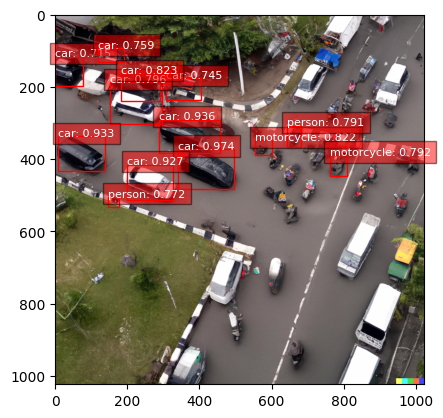

In [6]:
# Create a figure and axis
fig, ax = plt.subplots(1)
ax.imshow(image)

# Iterate through the detected objects
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]

    # Add a rectangle patch
    rect = patches.Rectangle(
        (box[0], box[1]), box[2] - box[0], box[3] - box[1], linewidth=1, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)

    # Display the class label and confidence score
    ax.text(
        box[0],
        box[1],
        f"{model.config.id2label[label.item()]}: {round(score.item(), 3)}",
        bbox=dict(facecolor='red', alpha=0.5),
        fontsize=8,
        color='white'
    )

plt.show()

In [7]:
results["boxes"]

tensor([[2.6867e-01, 1.1578e+02, 7.6396e+01, 1.9684e+02],
        [3.0776e+02, 1.7530e+02, 4.0457e+02, 2.3472e+02],
        [5.5422e+02, 3.4733e+02, 6.0101e+02, 3.8735e+02],
        [1.4799e+02, 5.0446e+02, 1.7634e+02, 5.3329e+02],
        [1.5131e+02, 1.8642e+02, 2.9726e+02, 3.0300e+02],
        [6.4339e+02, 3.0675e+02, 6.8028e+02, 3.6666e+02],
        [3.4127e+02, 3.7169e+02, 4.9544e+02, 4.8310e+02],
        [1.9973e+02, 4.1541e+02, 3.2644e+02, 5.1241e+02],
        [8.5175e+00, 3.3657e+02, 1.3900e+02, 4.3393e+02],
        [7.6116e+02, 3.8815e+02, 8.0921e+02, 4.4577e+02],
        [1.8391e+02, 1.6244e+02, 2.9206e+02, 2.3772e+02],
        [2.8800e+02, 2.9043e+02, 4.5725e+02, 3.8261e+02],
        [1.2036e+02, 9.1830e+01, 1.9190e+02, 1.3110e+02]],
       grad_fn=<IndexBackward0>)

### Real-time test

In [10]:
# Open the default camera (index 0)
cam = cv2.VideoCapture(0)

# Check if the camera is opened successfully
if not cam.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cam.read()

    # Perform object recognition or any other processing on the frame here
    # results = model(**frame)
    # # Display the frame
    # cv2.imshow("YOLO", results["boxes"])

    # Add a delay and check for a key press
    key = cv2.waitKey(1) & 0xFF

    # Break the loop if 'q' key is pressed
    if key == ord('q'):
        break

# Release the camera and close the window
cam.release()
cv2.destroyAllWindows()


In [ ]:
cam = cv2.VideoCapture(0) # 0 opens the default camera using default backend

while cam.isOpened():
    ret, frame = cam.read()

    # make detection and format the outputs
    target_frame = torch.tensor([frame.size[::-1]])
    output = model(frame)
    results = image_processor.post_process_object_detection(output, threshold=0.9, target_sizes=target_frame)[0]

    for box, score, label in zip(results['boxes'], results['scores'], results['labels']):
        x, y, w, h = box
        color = (0, 255, 0)  # Green
        label_text = f"{label}: {score:.2f}"

        cv2.rectangle(frame, (int(x), int(y)), (int(w), int(h)), color, 2)
        cv2.putText(frame, label_text, (int(x), int(y) - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

        cv2.imshow('Object Detection', frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(10) & 0xFF == ord('q'): # specifies the time(miliseconds) 
        break

# Release the camera and close the window
cam.release()
cv2.destroyAllWindows()


TypeError: 'int' object is not subscriptable